#### Explore the dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [43]:
# Load the dataset
data_frame = pd.read_csv('../data/bank-additional-full.csv', sep=';')

# Display basic info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
data_frame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
# find number of rows and column
data_frame.shape

(41188, 21)

In [46]:
# check duplicate rows
duplicates = data_frame[data_frame.duplicated()]

# Check for duplicate values
print("\nDuplicate Values:")
print(data_frame.duplicated().sum())
print(duplicates)


Duplicate Values:
12
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      re

In [47]:
#check missing values

#missing values are coded as 'unknown',replace them with NaN
data_frame.replace('unknown', np.nan, inplace=True)

missing_values = data_frame.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


Percentage of Missing Values in Each Column:
job           0.801204
marital       0.194231
education     4.202680
default      20.872584
housing       2.403613
loan          2.403613
dtype: float64


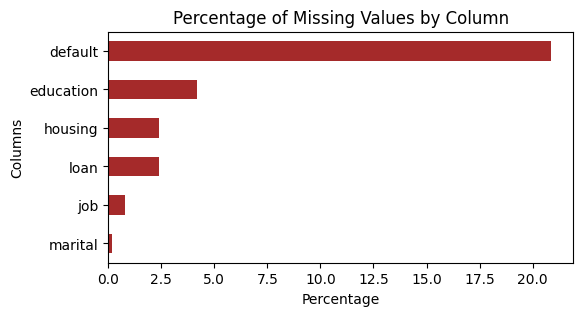

In [48]:
# percentage of missing values for each column
missing_percentage = (data_frame.isnull().sum() / len(data_frame)) * 100

# Display
missing_with_percentage = missing_percentage[missing_percentage > 0]
print("Percentage of Missing Values in Each Column:")
print(missing_with_percentage)

# Bar plot
missing_with_percentage.sort_values().plot(kind='barh', figsize=(6, 3), color='brown')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Percentage")
plt.ylabel("Columns")
plt.show()

In [49]:
# Find features with only one unique value
constant_features = data_frame.columns[data_frame.nunique() == 1]

# Display
print("Features with Only One Unique Value:")
print(constant_features) 

Features with Only One Unique Value:
Index([], dtype='object')


#### Explore categorical features

In [50]:
# Step 1: Identify categorical columns
categorical_columns = data_frame.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(categorical_columns))

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [51]:
# Step 2: Explore each categorical column
for col in categorical_columns:
    print(f"\nExploring Column: {col}")
    print(f"Number of Categories: {data_frame[col].nunique()}")
    print(f"Unique Values: {data_frame[col].unique()}")


Exploring Column: job
Number of Categories: 11
Unique Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

Exploring Column: marital
Number of Categories: 3
Unique Values: ['married' 'single' 'divorced' nan]

Exploring Column: education
Number of Categories: 7
Unique Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

Exploring Column: default
Number of Categories: 2
Unique Values: ['no' nan 'yes']

Exploring Column: housing
Number of Categories: 2
Unique Values: ['no' 'yes' nan]

Exploring Column: loan
Number of Categories: 2
Unique Values: ['no' 'yes' nan]

Exploring Column: contact
Number of Categories: 2
Unique Values: ['telephone' 'cellular']

Exploring Column: month
Number of Categories: 10
Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Exploring Column: day_of_week
Number of Categories

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\1403386249.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x=col, palette='viridis', order=data_frame[col].value_counts().index)
C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\1403386249.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x=col, palette='viridis', order=data_frame[col].value_counts().index)
C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\1403386249.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x=col, p

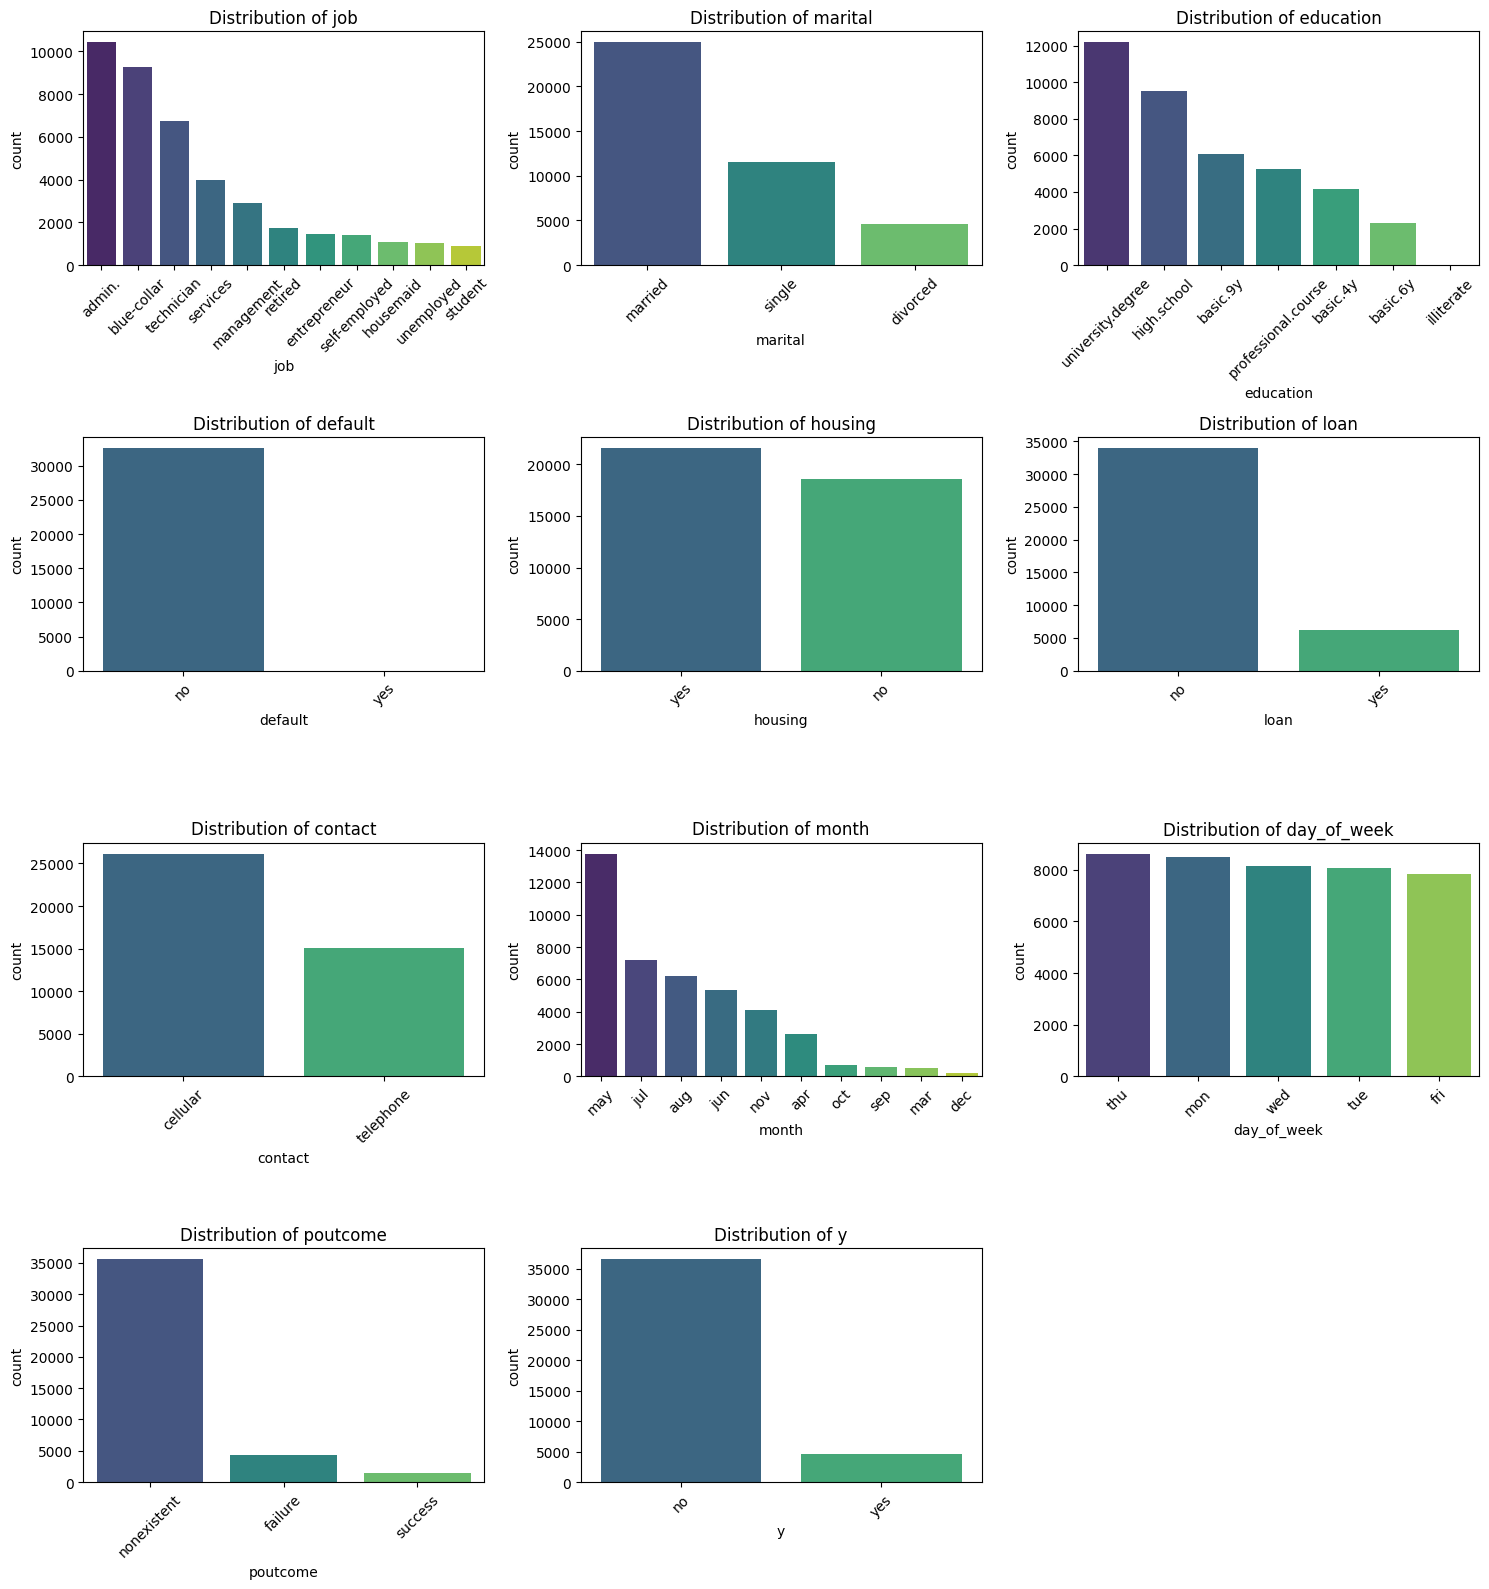

In [52]:
# Step 3: visualize the distribution of categorical features

# Number of plots per row
num_plots_per_row = 3
num_features = len(categorical_columns)
num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

# Create a figure
plt.figure(figsize=(15, 4 * num_rows))

# Plot each categorical feature
for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    sns.countplot(data=data_frame, x=col, palette='viridis', order=data_frame[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


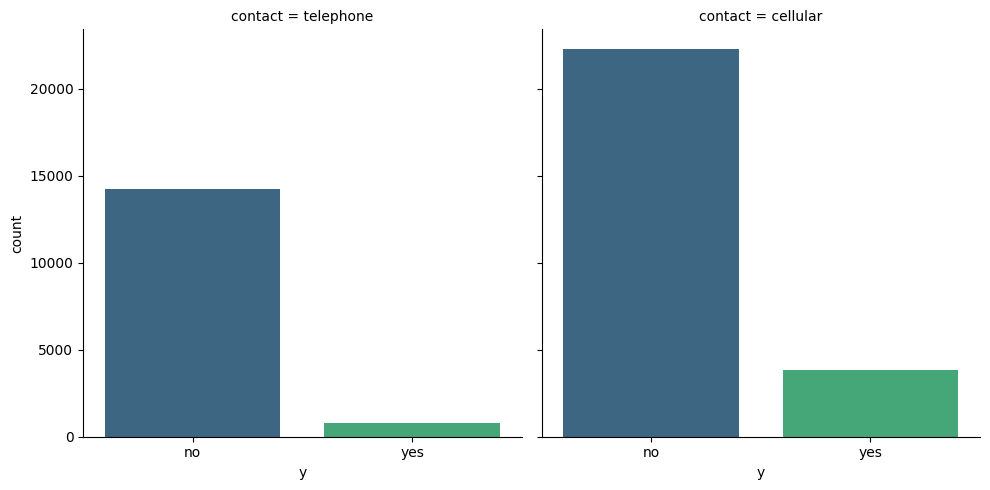

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


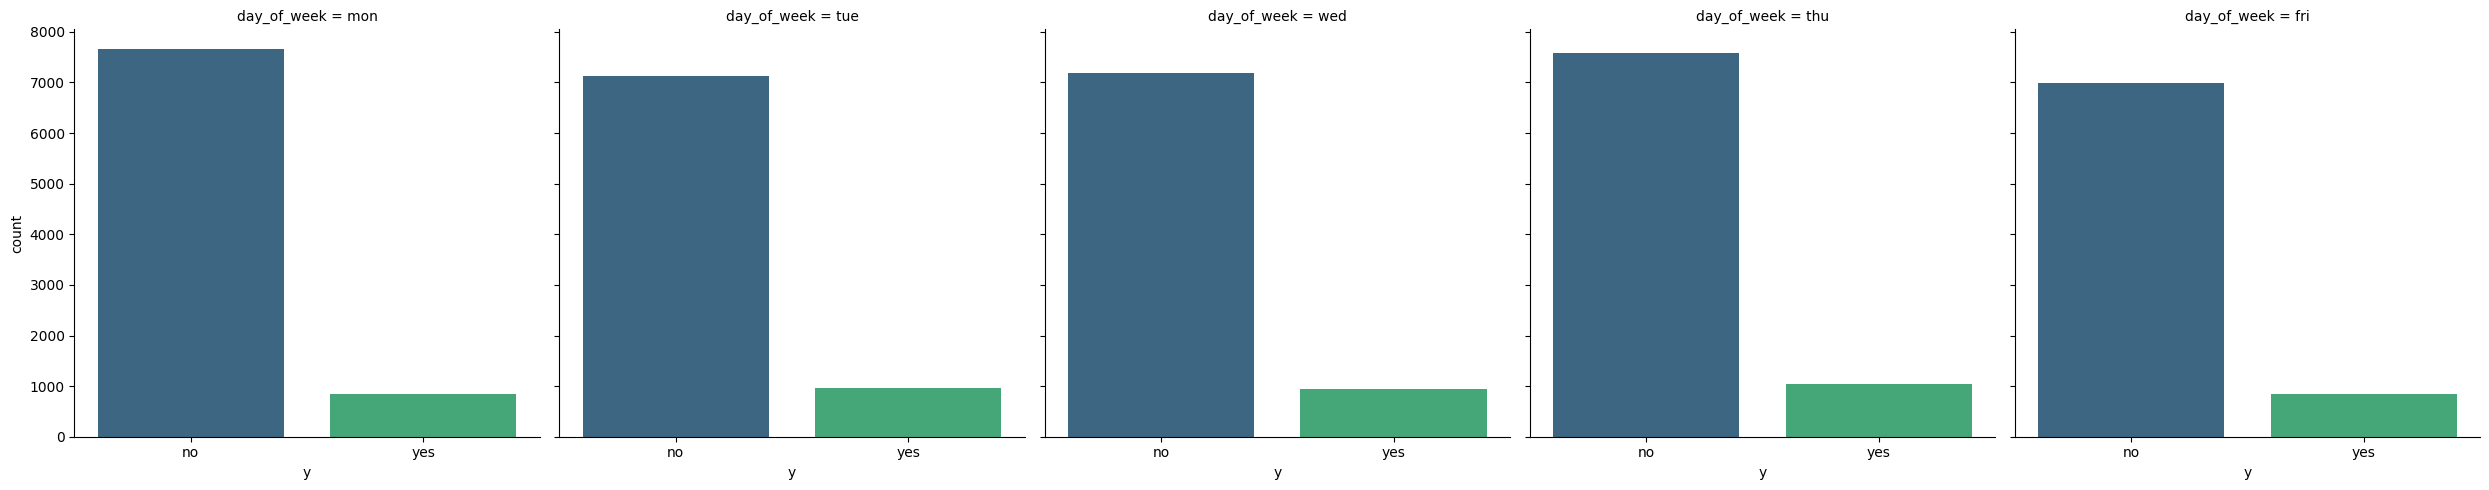

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


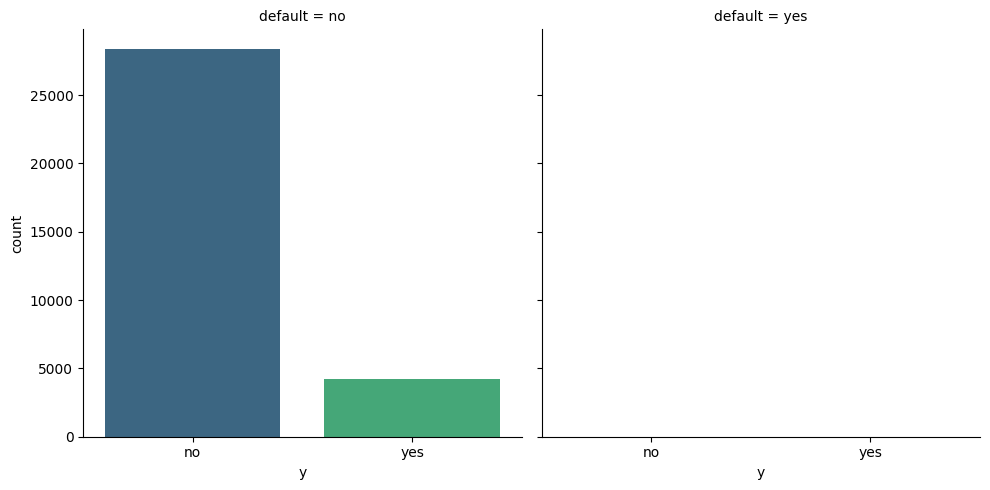

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


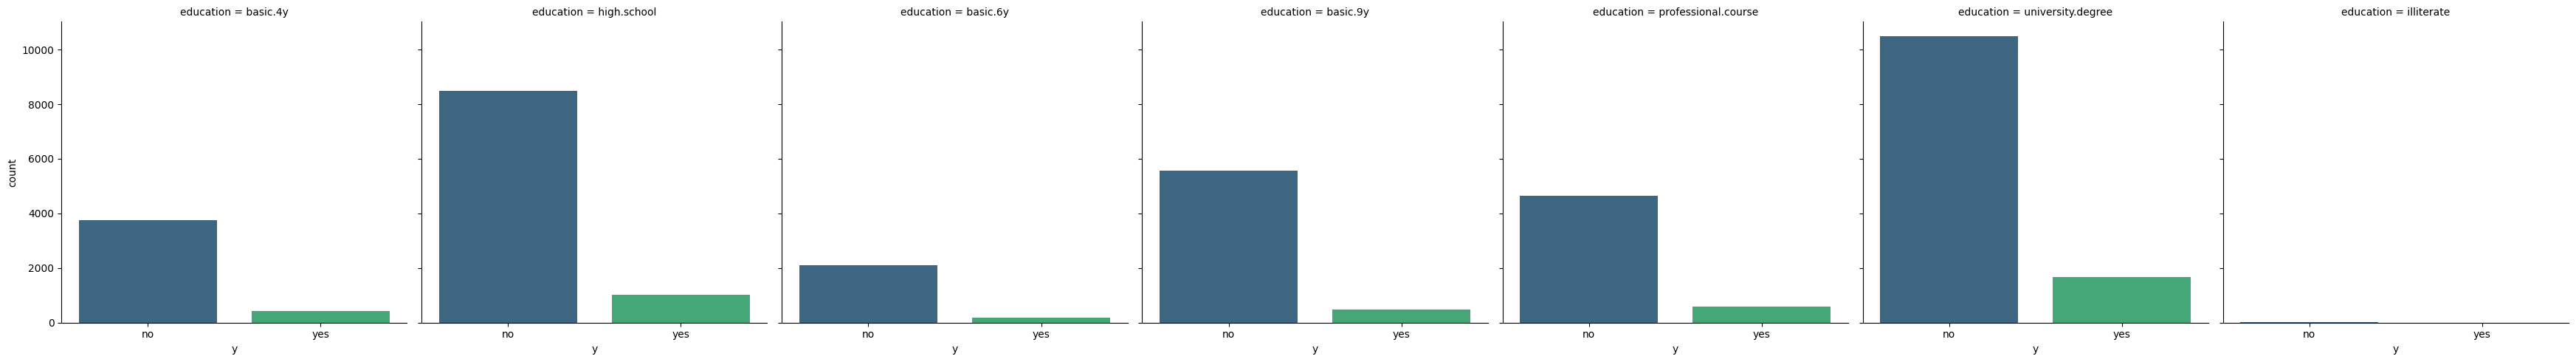

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


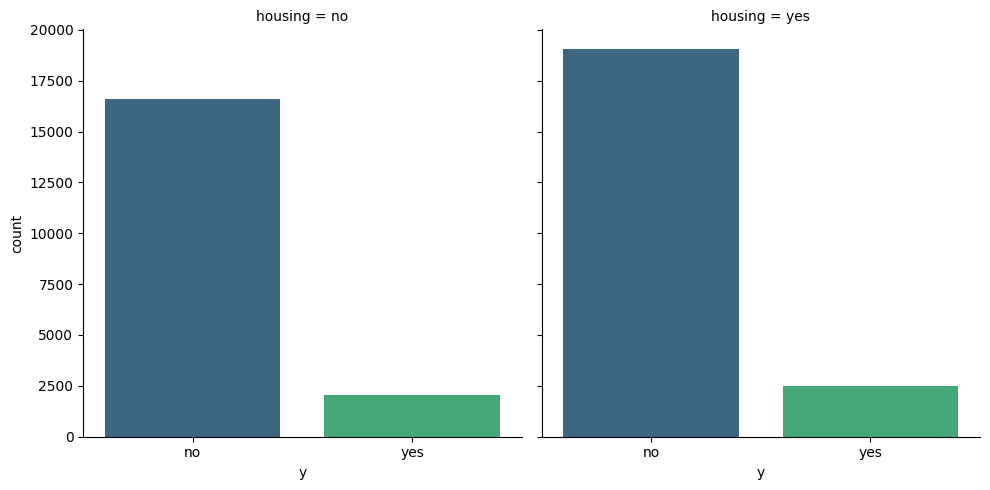

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


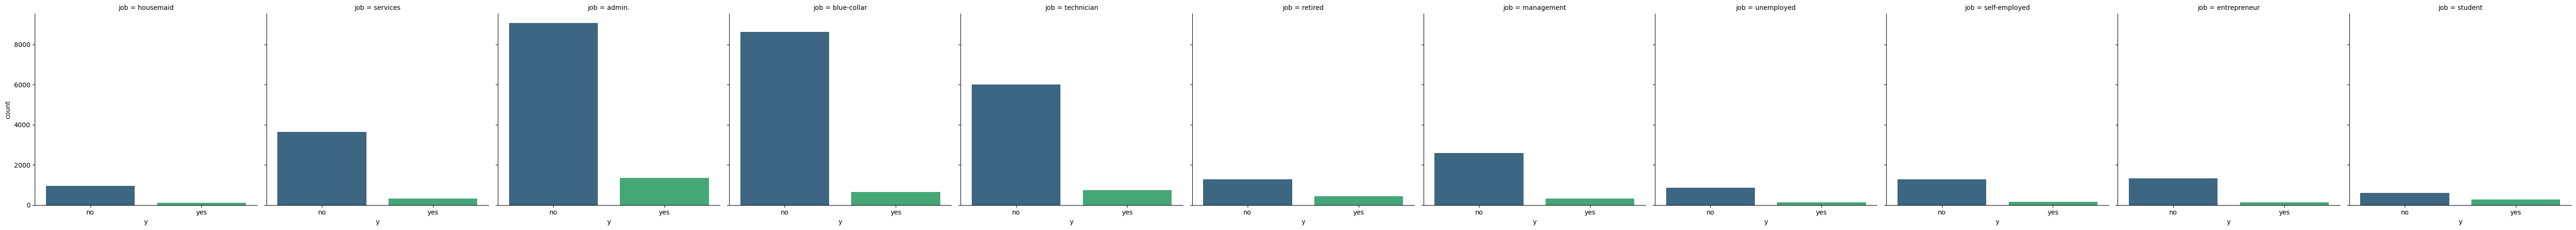

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


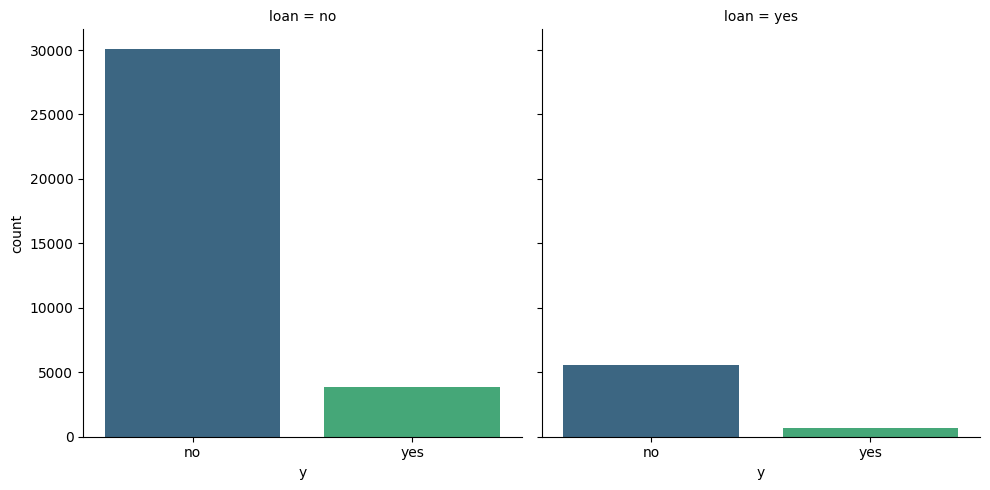

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


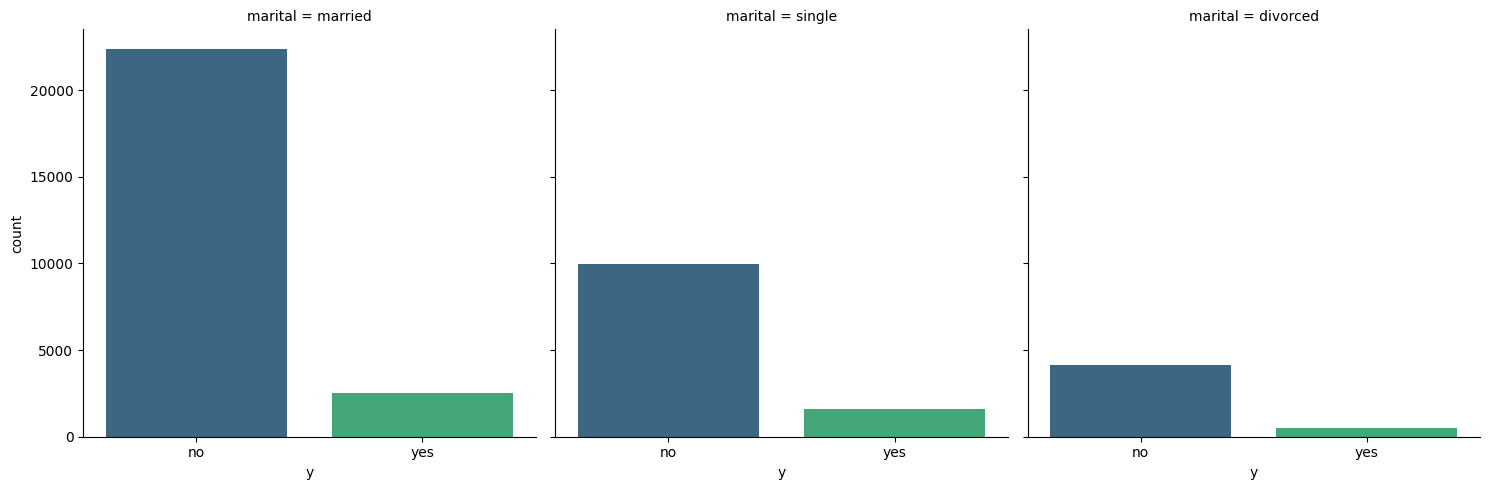

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


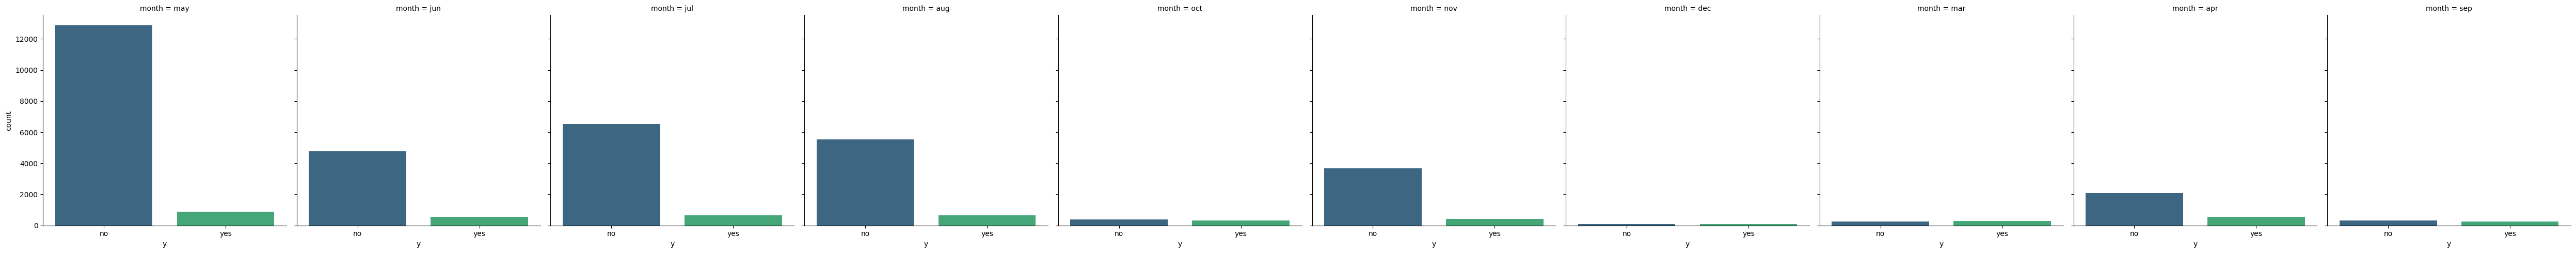

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\2959857983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')


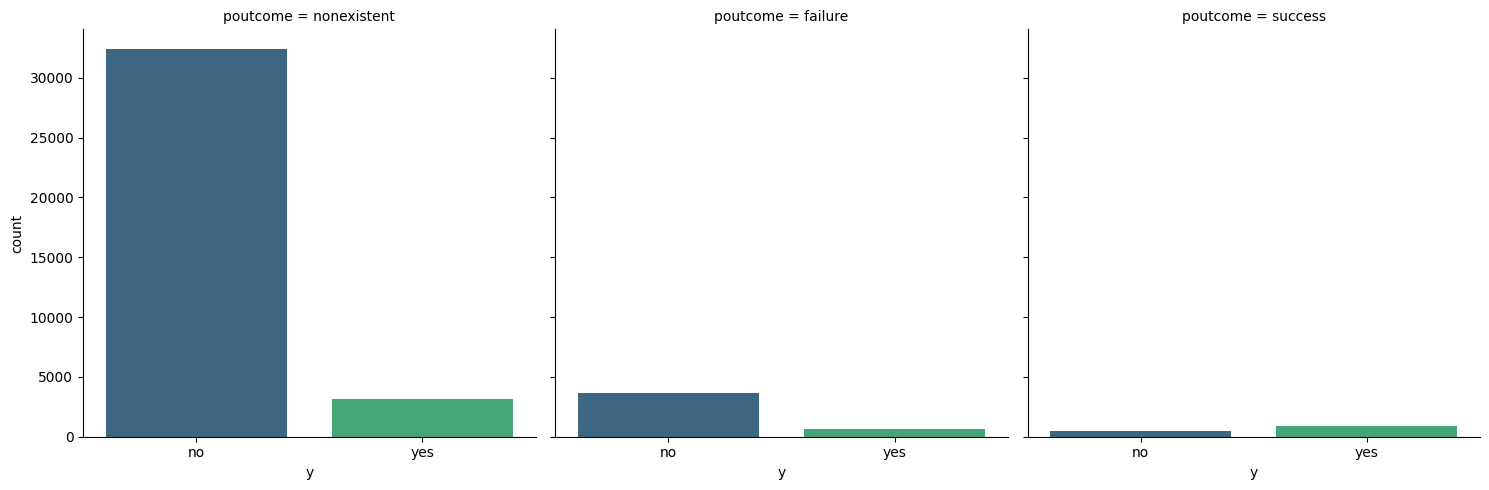

In [53]:
#Find out the relationship between categorical variable and target variable

# Target variable
target = 'y' 

# Identify categorical columns (excluding the target column)
categorical_columns = data_frame.select_dtypes(include=['object', 'category']).columns.difference([target])

# Generate count plots for each categorical feature
for categorical_feature in categorical_columns:
    sns.catplot(x=target, col=categorical_feature, kind='count', data=data_frame, palette='viridis')
    plt.show()    

#### Explore numerical values

In [54]:
# Summary statistics for numerical features
data_frame.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [55]:
# List numerical columns and their count
numerical_columns = data_frame.select_dtypes(include=['number']).columns
print(f"Numerical Columns {len(numerical_columns)}:")
print(numerical_columns)

Numerical Columns 10:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [56]:
data_frame[numerical_columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [57]:
# Split into discrete and continuous features
discrete_features = [col for col in numerical_columns if data_frame[col].nunique() < 20]  # Typically, fewer unique values
continuous_features = [col for col in numerical_columns if col not in discrete_features]

print(f"Discrete Features {len(discrete_features)} : {discrete_features}")
print(f"Continuous Features {len(continuous_features)} : {continuous_features}")

Discrete Features 3 : ['previous', 'emp.var.rate', 'nr.employed']
Continuous Features 7 : ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


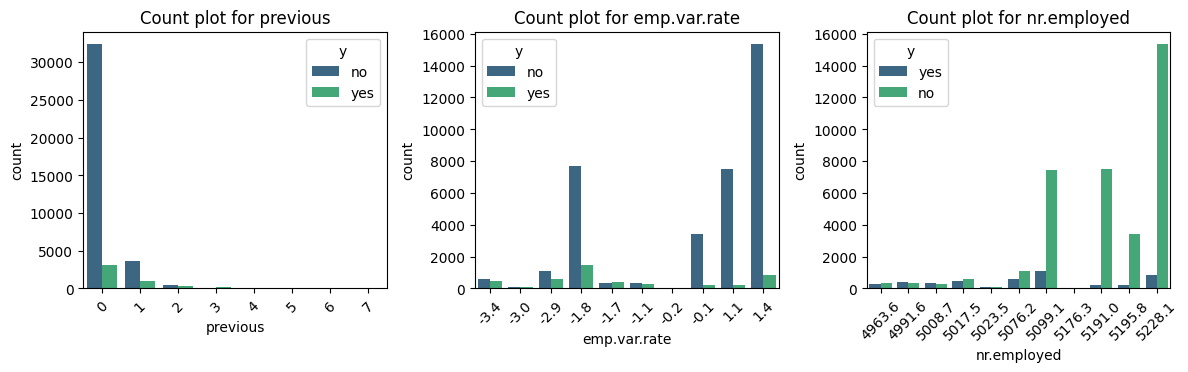

In [58]:
# Discrete Feature distribution plots

# Count plots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(discrete_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=data_frame, x=feature, hue=target, palette='viridis')
    plt.title(f'Count plot for {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


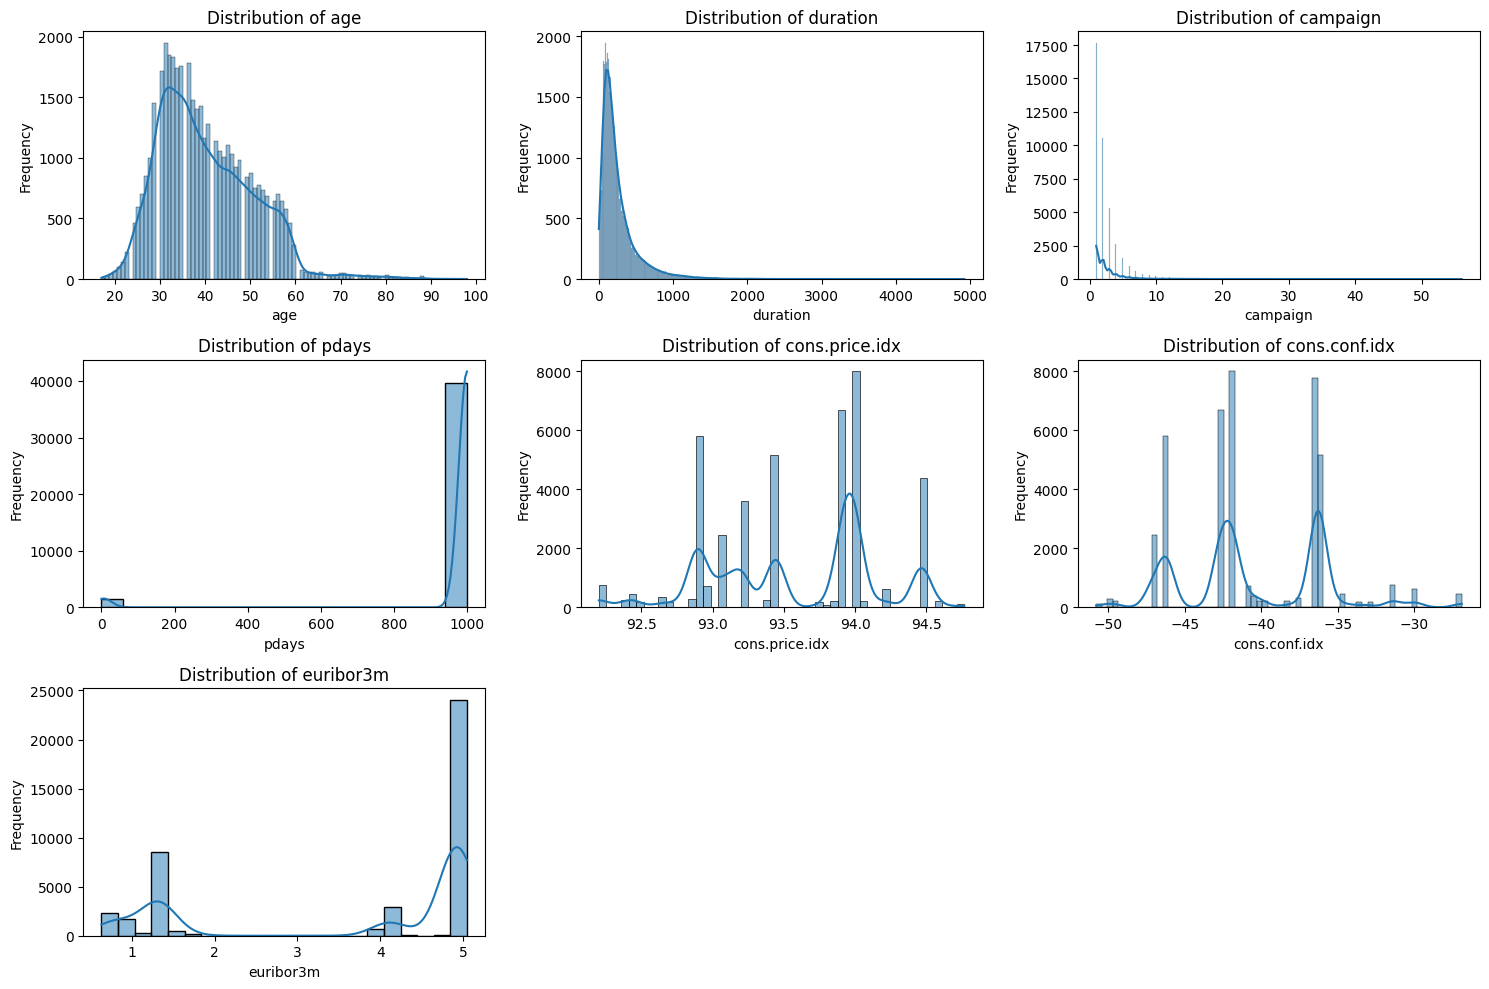

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\757750026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data_frame, palette='viridis')
C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\757750026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data_frame, palette='viridis')
C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\757750026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=data_frame, palette='viridis')
C:\Users\Nethma\AppData\Local\Temp\ip

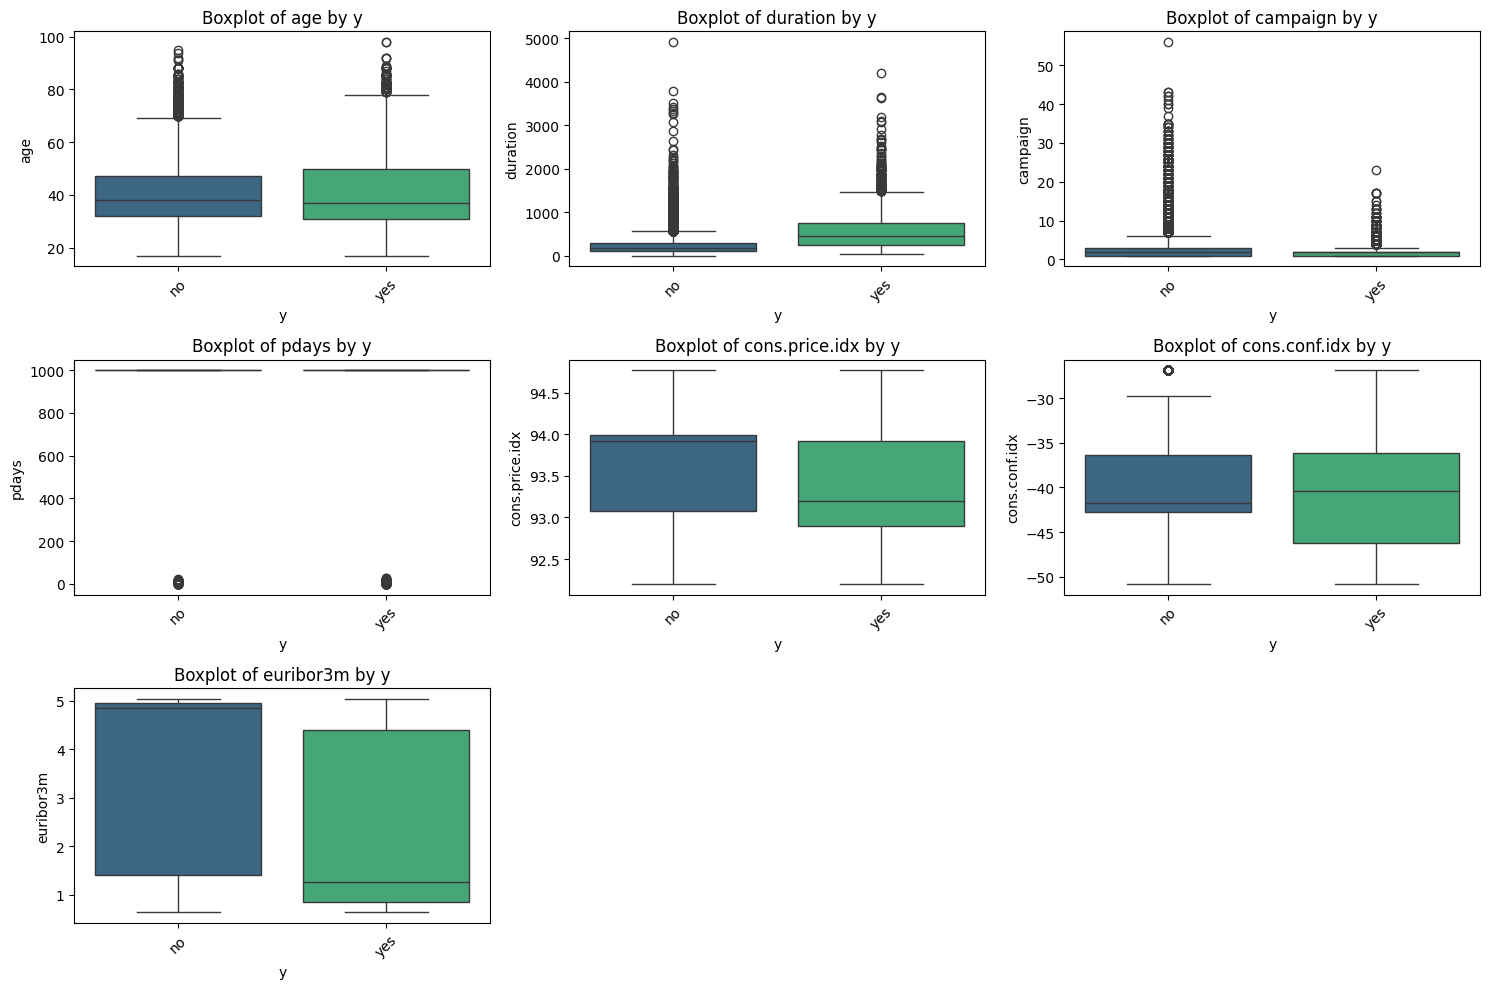

In [59]:
# Continuous Feature Distribution Plots:

# histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_frame[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=data_frame, palette='viridis')
    plt.title(f'Boxplot of {feature} by {target}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Finding outliers

Boxplots for Numerical Features:


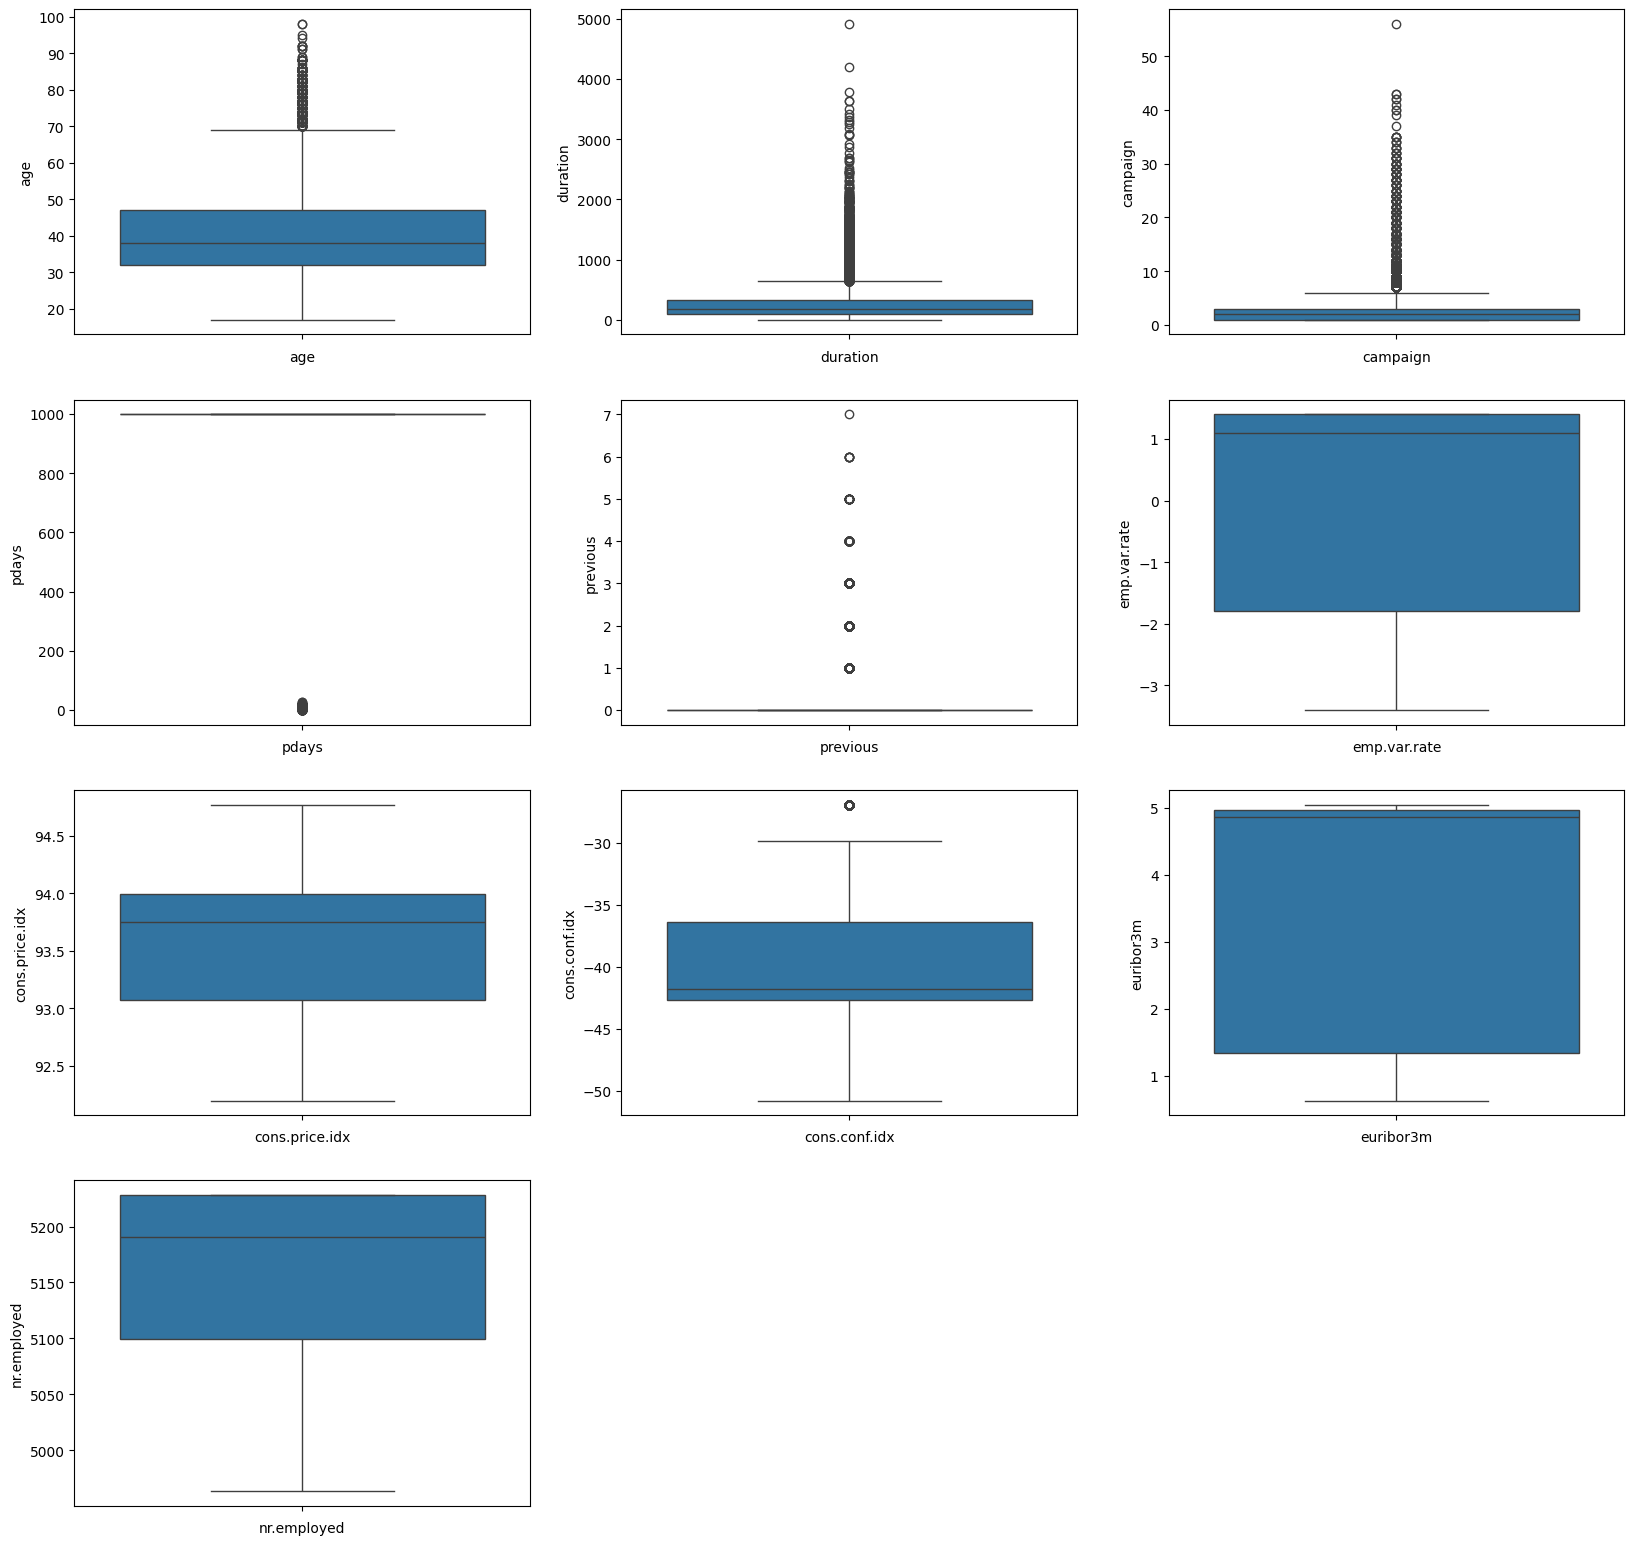


Outlier Analysis:
Feature: age
  Min Value: 17
  Max Value: 98
  Lower Bound (for outliers): 9.5
  Upper Bound (for outliers): 69.5
  Number of Outliers: 469
  Outliers (Sample): [70, 76, 73, 88, 88]
--------------------------------------------------
Feature: duration
  Min Value: 0
  Max Value: 4918
  Lower Bound (for outliers): -223.5
  Upper Bound (for outliers): 644.5
  Number of Outliers: 2963
  Outliers (Sample): [1666, 787, 812, 1575, 1042]
--------------------------------------------------
Feature: campaign
  Min Value: 1
  Max Value: 56
  Lower Bound (for outliers): -2.0
  Upper Bound (for outliers): 6.0
  Number of Outliers: 2406
  Outliers (Sample): [7, 8, 8, 7, 7]
--------------------------------------------------
Feature: pdays
  Min Value: 0
  Max Value: 999
  Lower Bound (for outliers): 999.0
  Upper Bound (for outliers): 999.0
  Number of Outliers: 1515
  Outliers (Sample): [6, 4, 4, 3, 4]
--------------------------------------------------
Feature: previous
  Min Value

In [60]:
#boxplot on numerical features to find outliers
print("Boxplots for Numerical Features:")

# Plot boxplots
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data_frame[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()


# Function to identify outliers and provide details
def find_outliers(data, numerical_features, threshold=1.5):
    outlier_summary = {}
    
    for feature in numerical_features:
        # Calculate Q1, Q3, and IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
        
        # Store outlier details
        outlier_summary[feature] = {
            'Min Value': data[feature].min(),
            'Max Value': data[feature].max(),
            'Lower Bound (for outliers)': lower_bound,
            'Upper Bound (for outliers)': upper_bound,
            'Number of Outliers': len(outliers),
            'Outliers (Sample)': outliers.head(5).tolist(),  # Sample first 5 outliers
        }
    
    return outlier_summary

# Outlier Analysis
print("\nOutlier Analysis:")
outlier_info = find_outliers(data_frame, numerical_columns)

# Print summary for each feature
for feature, details in outlier_info.items():
    print(f"Feature: {feature}")
    for key, value in details.items():
        print(f"  {key}: {value}")
    print("-" * 50)


#### Finding correlation

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

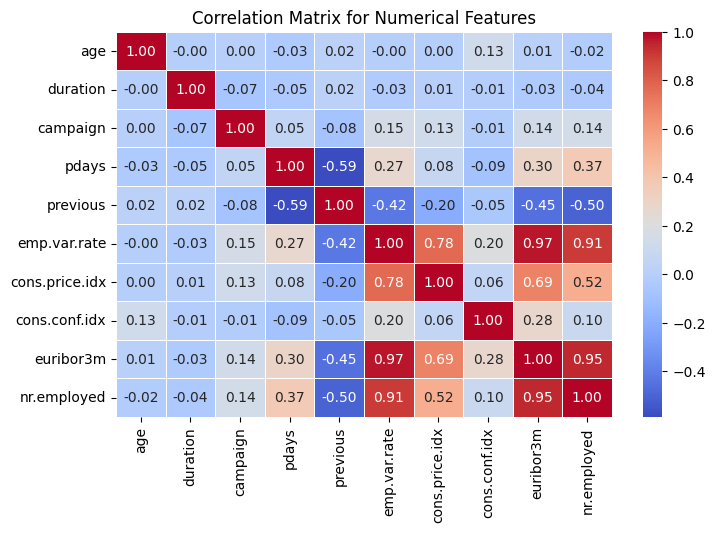

In [61]:
# Calculate correlation matrix
correlation_matrix = data_frame[numerical_columns].corr()

# Display 
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

#### target variable's distribution (class imbalance)

Target Variable Counts:
y
no     36548
yes     4640
Name: count, dtype: int64

Target Variable Percentage:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


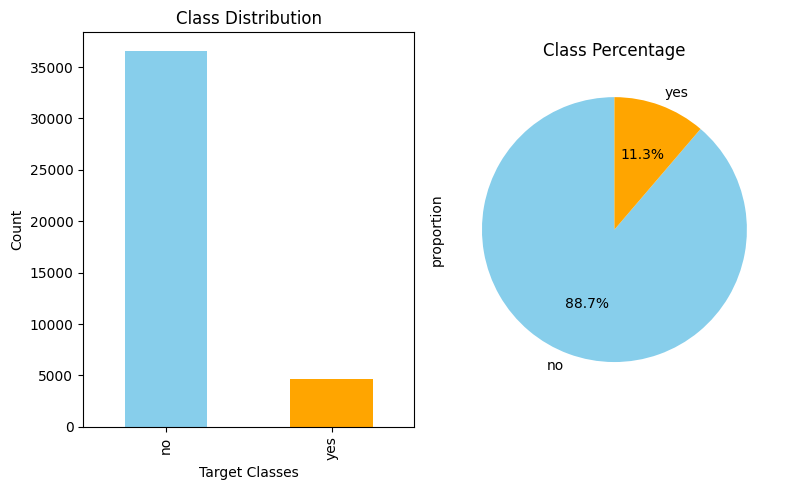

In [62]:
# Check target variable distribution
target_counts = data_frame['y'].value_counts()
target_percentage = data_frame['y'].value_counts(normalize=True) * 100

# Print counts and percentages
print("Target Variable Counts:")
print(target_counts)
print("\nTarget Variable Percentage:")
print(target_percentage)

# Visualize target variable distribution
plt.figure(figsize=(8, 5))

# Bar chart
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
target_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Class Percentage')
# plt.ylabel('')  # Remove y-axis label for clarity

plt.tight_layout()
plt.show()


##### Conclution- dataset is imbalanced ('no' is much larger than the 'yes')

#### Preprocessing

In [63]:
# create a copy of dataset
preprocessed_data = data_frame.copy()

##### Step 1: Remove Duplicates

##### Duplicates may bias the model, so they need to be removed.

In [64]:
# Remove duplicate rows-

# Check for duplicates
print(f"Duplicate rows: {preprocessed_data.duplicated().sum()}")

# Remove duplicates
preprocessed_data.drop_duplicates(inplace=True)

Duplicate rows: 12


##### Step 2: Handle missing values

- Columns with Low Missing Percentage: Imputation preserves the data, ensuring minimal information loss.
- Column with High Missing Percentage: Removing default avoids potential bias introduced by imputing a column with such significant missing data.

In [65]:
# Replace Missing Values with Mode (Low Missing Percentage)

# Replace missing values in categorical columns with mode
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    preprocessed_data[col].fillna(data_frame[col].mode()[0], inplace=True)

C:\Users\Nethma\AppData\Local\Temp\ipykernel_5400\3935736673.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  preprocessed_data[col].fillna(data_frame[col].mode()[0], inplace=True)


In [66]:
# Drop Columns with High Missing Values

# Drop 'default' column due to high percentage of missing values
preprocessed_data.drop(columns=['default'], inplace=True)

In [67]:
# Verify Missing Values After Imputation

# Re-check for missing values to ensure all are handled
missing_values_after = preprocessed_data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##### Step 3: Drop Irrelevant Columns

##### Remove columns based on domain knowledge and analyzing correlations using heatmap

In [68]:
# Columns to drop
columns_to_drop = ['day_of_week', 'month'] 

# Drop the columns
preprocessed_data.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print("Remaining columns:\n", preprocessed_data.columns)

Remaining columns:
 Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [69]:
# drop unknown values
# preprocessed_data.dropna(inplace=True)

In [70]:
preprocessed_data.shape

(41176, 18)

In [71]:
preprocessed_data.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Feature Engineering

##### Step 1: Normalization Numerical Features
###### StandardScaler standardizes the numerical features to have a mean of 0 and a standard deviation of 1.
###### Z-score normalization = (x - mean) / standard deviation

In [72]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous',
                       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Apply scaling to the numerical columns
preprocessed_data[numerical_features] = scaler.fit_transform(preprocessed_data[numerical_features])

# Display a preview of the scaled data
print("Standardized Numerical Features:\n", preprocessed_data[numerical_features].head())


Standardized Numerical Features:
         age  duration  campaign     pdays  previous  cons.price.idx  \
0  1.533143  0.010352 -0.565963  0.195443 -0.349551        0.722628   
1  1.629107 -0.421577 -0.565963  0.195443 -0.349551        0.722628   
2 -0.290177 -0.124626 -0.565963  0.195443 -0.349551        0.722628   
3 -0.002284 -0.413864 -0.565963  0.195443 -0.349551        0.722628   
4  1.533143  0.187751 -0.565963  0.195443 -0.349551        0.722628   

   cons.conf.idx  euribor3m  nr.employed  
0       0.886568   0.712463     0.331695  
1       0.886568   0.712463     0.331695  
2       0.886568   0.712463     0.331695  
3       0.886568   0.712463     0.331695  
4       0.886568   0.712463     0.331695  


##### Step 2: Transforming the pdays Column

In [73]:
# Transform 'pdays' column: 999 -> 0 (not contacted), others -> 1 (contacted previously)
preprocessed_data['pdays'] = preprocessed_data['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [74]:
preprocessed_data.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,housemaid,married,basic.4y,no,no,telephone,0.010352,-0.565963,1,-0.349551,nonexistent,1.1,0.722628,0.886568,0.712463,0.331695,no
1,1.629107,services,married,high.school,no,no,telephone,-0.421577,-0.565963,1,-0.349551,nonexistent,1.1,0.722628,0.886568,0.712463,0.331695,no
2,-0.290177,services,married,high.school,yes,no,telephone,-0.124626,-0.565963,1,-0.349551,nonexistent,1.1,0.722628,0.886568,0.712463,0.331695,no
3,-0.002284,admin.,married,basic.6y,no,no,telephone,-0.413864,-0.565963,1,-0.349551,nonexistent,1.1,0.722628,0.886568,0.712463,0.331695,no
4,1.533143,services,married,high.school,no,yes,telephone,0.187751,-0.565963,1,-0.349551,nonexistent,1.1,0.722628,0.886568,0.712463,0.331695,no


##### Step 3: Label Encoding Binary Categorical Variables

###### Binary categorical columns contain two unique values (e.g., "yes"/"no").
###### will use Label Encoding to convert these into numerical values:

- "yes" -> 1
- "no" -> 0

In [75]:
for col in ['housing', 'loan', 'contact', 'y']:
    print(f"Unique values in {col}:", preprocessed_data[col].unique())

Unique values in housing: ['no' 'yes']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['telephone' 'cellular']
Unique values in y: ['no' 'yes']


In [76]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode/ target variable
binary_columns = ['housing', 'loan', 'contact', 'y']

# Apply label encoding to each column
for col in binary_columns:
    preprocessed_data[col] = label_encoder.fit_transform(preprocessed_data[col])

In [77]:
# Display the first few rows of the encoded columns
print(preprocessed_data[binary_columns].head())

   housing  loan  contact  y
0        0     0        1  0
1        0     0        1  0
2        1     0        1  0
3        0     0        1  0
4        0     1        1  0


##### Step 4: One-Hot Encoding Nominal Categorical Variables

###### For categorical variables with more than two unique values, will apply One-Hot Encoding.

In [78]:
# Perform One-Hot Encoding for nominal categorical columns
preprocessed_data= pd.get_dummies(
    preprocessed_data, 
    columns=['job', 'marital', 'poutcome', 'education'], 
    drop_first=True
)

# Display the updated dataset with encoded columns
preprocessed_data.head()


,age,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,marital_married,marital_single,poutcome_nonexistent,poutcome_success,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,1.533143,0,0,1,0.010352,-0.565963,1,-0.349551,1.1,0.722628,...,True,False,True,False,False,False,False,False,False,False
1,1.629107,0,0,1,-0.421577,-0.565963,1,-0.349551,1.1,0.722628,...,True,False,True,False,False,False,True,False,False,False
2,-0.290177,1,0,1,-0.124626,-0.565963,1,-0.349551,1.1,0.722628,...,True,False,True,False,False,False,True,False,False,False
3,-0.002284,0,0,1,-0.413864,-0.565963,1,-0.349551,1.1,0.722628,...,True,False,True,False,True,False,False,False,False,False
4,1.533143,0,1,1,0.187751,-0.565963,1,-0.349551,1.1,0.722628,...,True,False,True,False,False,False,True,False,False,False


In [79]:
preprocessed_data.shape

(41176, 34)

##### Remove / Capping outliers

In [80]:
# Define the threshold for outliers
def cap_outliers(df, numerical_features, threshold=1.5):
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Cap values
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
        
    return df

# List of numerical features with outliers
numerical_features = ['age','duration', 'campaign', 'pdays', 'previous']

# Apply the function
data_cleaned = cap_outliers(preprocessed_data, numerical_features, threshold=2.0)

# Display cleaned data shape
print(f"Data shape after outlier capping: {data_cleaned.shape}")

Data shape after outlier capping: (41176, 34)


In [81]:
# Save the cleaned dataset to a CSV file
data_cleaned.to_csv('../data/cleaned-data.csv', index=False)
print("Cleaned data saved to 'cleaned-data.csv'")

Cleaned data saved to 'cleaned-data.csv'


In [82]:
#load the cleaned_data

# cleaned_data = pd.read_csv('../data/cleaned-data.csv')
# print(f"Shape of the cleaned data: {cleaned_data.shape}")